In [96]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
from functions_old.multi_gradient_descent import *
from math import log

In [97]:
# ls = []
# leadger = []
# def categorical_data(x):
#     if x not in ls:
#         ls.append(x)
#     return ls.index(x)

# data['diagnosis'] = data['diagnosis'].apply(categorical_data)
# leadger.append(ls)
# ls =[]
# data['loc'] = data['loc'].apply(categorical_data)
# leadger.append(ls)
# ls =[]
# data['stereo'] = data['stereo'].apply(categorical_data)
# leadger.append(ls)
# ls =[]
# data['sex'] = data['sex'].apply(categorical_data)
# leadger.append(ls)
# ls =[]
# print(leadger)
# # data
# x_data = np.array(data[['ki','gtv']])
# y_data = np.array(data['status'])


In [98]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def fun(x,w,b):
    return sigmoid(np.dot(w,x) + b)

def cost(x,y,w,b):
    k = 0
    for i in range(x.shape[0]):
        k += -log(sigmoid(np.dot(w,x[i]) + b))*y[i] - log(1-sigmoid(np.dot(w,x[i])+b))*(1-y[i])
    return k/x.shape[1]

def compute_gradient(x,y,w,b):
    lambda_ = 1
    dj_dw = np.zeros(x.shape[1])
    dj_db = 0
    for i in range(x.shape[0]):
        k = fun(x[i],w,b)-y[i]
        for j in range(x.shape[1]):
            dj_dw[j] += k*x[i][j]
        dj_db += k

# for regression
    # for j in range(x.shape[0]):
    #     dj_dw[j] = dj_dw[j]/x.shape[0] + (lambda_/x.shape[0]) * w[j]
    return dj_dw/x.shape[0],dj_db/x.shape[0]

def logistic_descent(x,y,alpha = 0.01,iter =10000 ):
    w = np.zeros(x.shape[1])
    b =0
    for i in range(iter):
    
        dj_dw,dj_db = compute_gradient(x,y,w,b)

        w = w - alpha*dj_dw
        b = b- alpha*dj_db
        if i%100 ==0:
            print(w,b,"-------------------------------- cost: ")
                #   ,cost(x,y,w,b))
            pass
    return w,b





In [99]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
per_w,per_b = logistic_descent(x_train,y_train)
print(per_w,per_b)

[0.0025     0.00166667] 0.0 -------------------------------- cost: 
[0.16543179 0.09922341] -0.05014653558288621 -------------------------------- cost: 
[0.24898437 0.13770963] -0.14360533027278033 -------------------------------- cost: 
[0.30846869 0.16268331] -0.24724789977961115 -------------------------------- cost: 
[0.35885531 0.18569906] -0.35235789254301847 -------------------------------- cost: 
[0.40466423 0.20957405] -0.45655445260509636 -------------------------------- cost: 
[0.44747997 0.23478301] -0.5592037612664584 -------------------------------- cost: 
[0.48800274 0.26119741] -0.6601637915100677 -------------------------------- cost: 
[0.52663552 0.2885664 ] -0.7594299962219178 -------------------------------- cost: 
[0.56365996 0.31664509] -0.8570344598405929 -------------------------------- cost: 
[0.59929361 0.34522365] -0.9530174120757373 -------------------------------- cost: 
[0.63371192 0.37412933] -1.0474194714485907 -------------------------------- cost: 
[0.

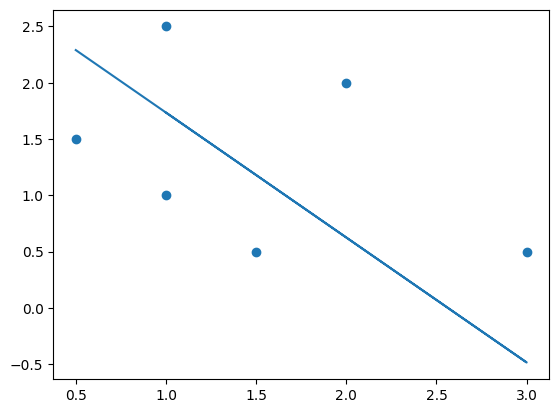

In [100]:
boundary = np.array([ [x[0] ,(-per_w[0]*x[0]-per_b)/per_w[1]]  for x in x_train])

pl.scatter(x_train[:,0], x_train[:,1])
pl.plot(boundary[:,0], boundary[:,1])
pl.show()

<h>TEst 2

In [109]:
data = np.loadtxt("C:\code\ml\Coursera\material\C1 - Supervised Machine Learning - Regression and Classification\week3\C1W3A1\data\ex2data1.txt",delimiter = ',')
x_train = data[:,:2]
y_train = data[:,2]
# x_train = np.array([[x,y,x**2,y**2] for x,y in list(x_train)])
x_train = np.c_[x_train[:,0],x_train[:,1],x_train[:,0]**2,x_train[:,1]**2]
print(x_train)
y_train

[[  34.62365962   78.02469282 1198.79780579 6087.85268893]
 [  30.28671077   43.89499752  917.28484916 1926.77080763]
 [  35.84740877   72.90219803 1285.03671552 5314.73047718]
 [  60.18259939   86.3085521  3621.94526888 7449.16616482]
 [  79.03273605   75.34437644 6246.17336766 5676.77506067]
 [  45.08327748   56.31637178 2032.50190804 3171.53373064]
 [  61.10666454   96.51142588 3734.02445082 9314.45532634]
 [  75.02474557   46.55401354 5628.71244745 2167.27617679]
 [  76.0987867    87.42056972 5791.02533756 7642.35601004]
 [  84.43281996   43.53339331 7128.9010866  1895.15633315]
 [  95.86155507   38.22527806 9189.43774062 1461.17188261]
 [  75.01365839   30.60326323 5627.04894499  936.55972059]
 [  82.30705337   76.4819633  6774.45103511 5849.49071058]
 [  69.36458876   97.71869196 4811.4461738  9548.94275874]
 [  39.53833914   76.03681085 1563.28026224 5781.59660441]
 [  53.97105215   89.20735014 2912.87447002 7957.95131855]
 [  69.07014406   52.74046973 4770.68480086 2781.5571473

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [102]:

X = feature_scaling(x_train)
# y_train = feature_scaling(y_train)

In [103]:
per_w,per_b = logistic_descent(X,y_train,1,5000)
print(per_w,per_b)

[0.0780402  0.06797865] 0.1 -------------------------------- cost: 
[4.10825895 3.70581617] 0.5772326117860666 -------------------------------- cost: 
[5.80166997 5.31074615] 0.7303884497197127 -------------------------------- cost: 
[6.8957811 6.3662968] 0.8439326371842828 -------------------------------- cost: 
[7.70888357 7.15796123] 0.9332214670616666 -------------------------------- cost: 
[8.35579418 7.79117642] 1.006359409688645 -------------------------------- cost: 
[8.89161337 8.31740677] 1.0679702203265238 -------------------------------- cost: 
[9.34733678 8.76597192] 1.1209283995226196 -------------------------------- cost: 
[9.74227597 9.15531224] 1.1671439648813022 -------------------------------- cost: 
[10.08935266  9.49785375] 1.2079526601145094 -------------------------------- cost: 
[10.39768009  9.8024072 ] 1.2443268306562512 -------------------------------- cost: 
[10.67395033 10.07546953] 1.2769974017526884 -------------------------------- cost: 
[10.92323702 10.

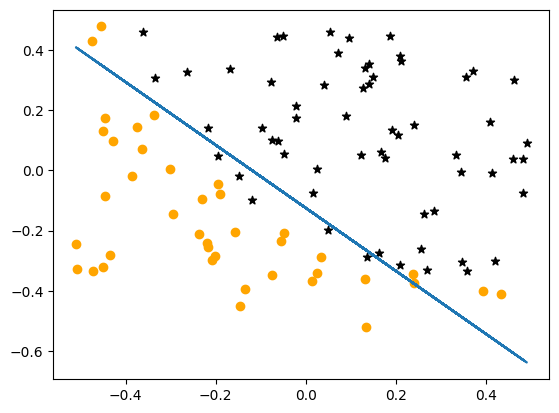

In [104]:
boundary = np.array([ [x[0] ,(-per_w[0]*x[0]-per_b)/per_w[1]]  for x in x_train])
for i in range(y_train.shape[0]):
    if y_train[i] == 1:
        pl.scatter(x_train[i,0], x_train[i,1],marker='*',color='black')
    else:
        pl.scatter(x_train[i,0], x_train[i,1],marker='o',color= 'orange')
        

pl.plot(boundary[:,0], boundary[:,1])
pl.show()